## Import and directories

In [1]:
#directories
import os
try:
    parentdir
except NameError:
    parentdir=os.getcwd()
else:
    parentdir = parentdir
print('The working directory is parentdir: %s' %parentdir)
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

The working directory is parentdir: /home/biswajit/Research/Reports_ppt/reports/AzurinSM-MS4/Azurin_SM_repo/Manuscript/Figure_SI


In [2]:
#Run this once to run the .py(Analysis_bis.py) file.
os.chdir(r'/home/biswajit/Research/Reports_ppt/reports/AzurinSM-MS4/Azurin_SM_repo/Analysis')
!python Analysis_bis.py
%run Analysis_bis.py

In [8]:
mpl.rcParams["font.family"] = "sans-serif"
mpl.rcParams["font.size"] = "14"

## Time traces

Time traces of $Zinc$ Azurin labeled with ATTO 655 at different potential.

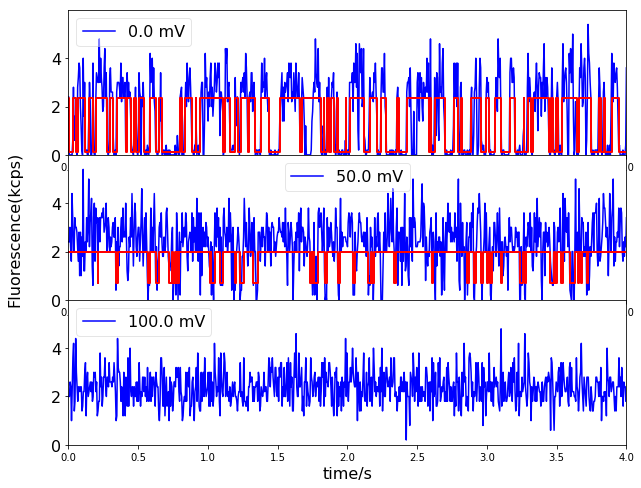

In [7]:
homedir_A4=r'/home/biswajit/Research/Reports_ppt/reports/AzurinSM-MS4/data/201609/20160909_ZnAzuA655_Ferri_Asc/S82d9Sept16_0.11uW639nm_ZnAzu655_0.1mMAsc_0.2mMFerri_A4'
fig = time_trace_plot(foldername= homedir_A4, input_potential=[0, 50, 100], pointnumbers=[6], x_lim_min=0, y_lim_min=0, x_lim_max=4, y_lim_max=6, bin=5, show_changepoint=True)
os.chdir(parentdir)
savefig('SI_timetrace_Zn_part.pdf', dpi=300, transparent=True)

Time traces of $Copper$ Azurin labeled with ATTO 655 at different potential.

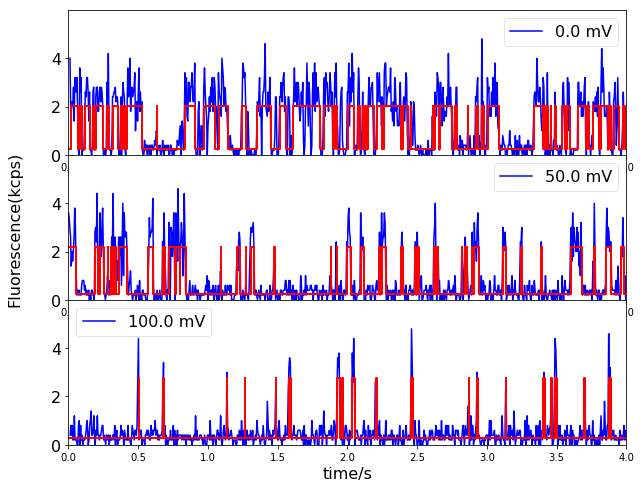

In [6]:
folder=r'/home/biswajit/Research/Reports_ppt/reports/AzurinSM-MS4/data/201609/20160910_CuAzu655Ferri_asc_2ndtime/S83d10Sept16_CuAz655_0.1mMAsc_0.2mMFerri_0.11uW_A3/30sec_trace'
fig = time_trace_plot(foldername= folder, input_potential=[0, 50, 100], pointnumbers=[1], x_lim_min=0, y_lim_min=0, x_lim_max=4, y_lim_max=6, bin=5, show_changepoint=True)
os.chdir(parentdir)
savefig('SI_timetrace_Cu_part.pdf', dpi=300, transparent=True)